In [ ]:
from util import *
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [7]:
def run_single_time_window(monkey, event_want, offset, time_window, spatial_step=3):
    spatial_xid=[]
    spatial_yid=[]
    acc_ls=[]
    time_id=[]
    all_feat, labels = get_all_feat_and_labels(monkey, event_want, offset, time_window)
    labels = labels.view('<U2')[::2]
    for i in range (1, 10-spatial_step+2):
        for j in range (1, 10-spatial_step+2): 
            elecs = get_electrodes(monkey, i, j, spatial_step)
            data = []
#             for ch in elecs:
#                 if ch == -1: continue
#                 data.append(all_feat[ch]['st_feat'])
            if monkey == 'N':
                for ch in elecs:
                    if ch == -1: continue
                    data.append(all_feat[ch]['lfp_feat'])
            data = np.concatenate(data, axis=1)
            train_num=int(0.8*data.shape[0])

            X_train, y_train, X_test, y_test = data[:train_num], labels[:train_num], data[train_num:], labels[train_num:]
            # Normalize data
            scaler = StandardScaler()  # normalization: zero mean, unit variance
            scaler.fit(X_train)  # scaling factor determined from the training set

            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)
            
            pca = PCA(n_components=100)
            pca.fit(X_train)
            X_train = pca.transform(X_train)
            X_test = pca.transform(X_test)
            
            
#             clf = MLPClassifier(hidden_layer_sizes=(50), learning_rate_init=0.01, max_iter=500, verbose=0)
            clf = SVC(kernel='sigmoid', C=1)
            clf.fit(X_train, y_train)

            accuracy = (clf.predict(X_test) == y_test).mean()
            spatial_xid.append(i)
            spatial_yid.append(j)
            acc_ls.append(accuracy)
            time_id.append(offset)
    return pd.DataFrame(list(zip(spatial_xid, spatial_yid, time_id, acc_ls)), columns = ['X', 'Y', 'Time Stamp', 'Accuracy'])

In [3]:
dfs = []
for t in tqdm(range(0, 16)):
    dfs.append(run_single_time_window('L', 'SR', -0.8+0.1*t, 0.1, 3))

 19%|█▉        | 3/16 [00:06<00:26,  2.01s/it]


KeyboardInterrupt: 

In [4]:
df = pd.concat(dfs).reset_index()

In [11]:
df2 = df.loc[df['Time Stamp'] == -0.8+0.1*3]

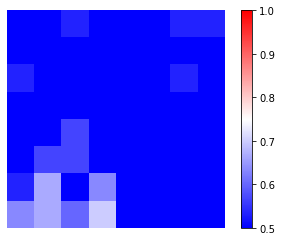

In [12]:
accs = np.zeros((df2['X'].max(), df2['Y'].max()))
accs[df2['X']-1, df2['Y']-1] = df2['Accuracy']
plot_heatmap(accs, vmin=0.5)

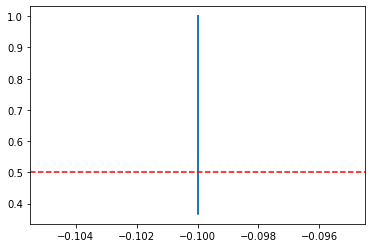

In [98]:
plt.plot(df2['Time Stamp'], df2['Accuracy'])
plt.axhline(0.5, linestyle='--', color='r')

In [8]:
df = run_single_time_window('N', 'SR', -0.8, 1.6, 10)

In [4]:
df

,X,Y,Time Stamp,Accuracy
0,1,1,-0.8,0.419355


In [5]:
all_feat, labels = get_all_feat_and_labels('N', 'SR', 0, 0.2)

/usr/local/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 500 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


In [6]:
all_feat[2]['lfp_feat'].shape

(153, 1010)

In [20]:
scaler = StandardScaler()
scaler.fit([[1, 2], [0, -2], [1, 10], [0, -10]])
scaler.var_

array([ 0.25, 52.  ])